### Import packages

In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from density_sample import *
sns.set_style('darkgrid')
%matplotlib inline

### Simulate data 

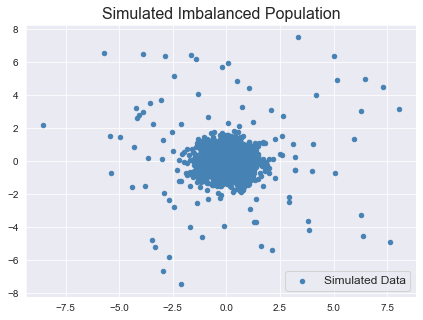

In [2]:
# Random 2-dimensional data 
np.random.seed(0)
X_outer = np.random.normal(0, 5, size=(100,2))
X_inner = np.random.normal(0, 1, size=(1900,2))
X = np.concatenate([X_outer,X_inner])

# Scaling the data 
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.figure(figsize=(7,5))
plt.title('Simulated Imbalanced Population',fontsize=16)
plt.scatter(X[:,0],X[:,1],s=20,label='Simulated Data',color='steelblue')
plt.legend(fontsize=12,loc='lower right');

### Generate samples and plot

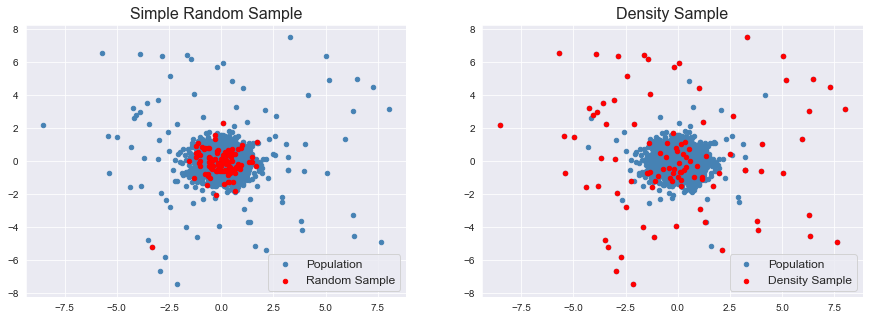

In [3]:
# Sample parameters
sample_fraction = 0.05
seed = 2
power = 1.5

# Density sample
X_sample_density,index_density = density_sample(X,power=power,size=sample_fraction,random_state=seed)

# Simple random sample to compare with
np.random.seed(seed)
arr = np.arange(X.shape[0])
index_random = np.random.choice(arr, size=int(X.shape[0]*(sample_fraction)), replace=False,p=None) 

# Plot the samples
X_sample_random = X[index_random]
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(X[:,0],X[:,1],s=20,label='Population',color='steelblue')
ax1.scatter(X_sample_random[:,0],X_sample_random[:,1],s=20,label='Random Sample',color='red')
ax2.scatter(X[:,0],X[:,1],s=20,label='Population',color='steelblue')
ax2.scatter(X_sample_density[:,0],X_sample_density[:,1],s=20,label='Density Sample',color='red')
ax1.set_title('Simple Random Sample',fontsize=16)
ax2.set_title('Density Sample',fontsize=16)
ax1.legend(fontsize=12,loc='lower right');
ax2.legend(fontsize=12,loc='lower right');